# Perceptron

假设数据线性可分，且属于二分类问题。

In [2]:
import pandas as pd
import numpy as np

算法实现：

In [3]:
class Perceptron(object):
    def __init__(self, max_iter=5000, eta=0.1):
        self.max_iter_ = max_iter  #最大迭代次数
        self.eta_ = eta            #学习率
        self.coef_ = 0             #感知机模型的系数w
        self.intercept_ = 0        #感知机模型的截距b
        
    def sign(self, x, w, b):
        return np.dot(x, w) + b   #当为一维数组时，np.dot为内积   
        
    def fit(self, X, y):           #输入的参数X,y是二维数组 其中y为二值1或-1
        self.coef_ = np.zeros(X.shape[1])  #初始化系数，系数个数为特征向量个数，即为列的个数
        n_iter_ = 0
        
        mis_points =True                   #如果没有分类错误点，则停止循环
        while mis_points:
            wrong_count = 0                 #用于记录错误分类点
               
            for i in np.arange(X.shape[0]):                 #遍历所有的点，使用梯度下降法更新参数
                if y[i] * self.sign(X[i], self.coef_, self.intercept_) <= 0:
                    self.coef_ += self.eta_ * y[i] * X[i]
                    self.intercept_ += self.eta_ * y[i]
                    wrong_count += 1
                    n_iter_ += 1
                    
            if n_iter_ > self.max_iter_:     #超出最大迭代次数则停止循环，如果数据不是线性可分，防止崩溃
                break
                
            if wrong_count == 0:
                mis_points =False
                
    def predict(self, X):    #输入参数为一维数组
        return np.array([1 if labels else -1 for labels in self.sign(X, self.coef_, self.intercept_) > 0])
        

# 测试

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal width')

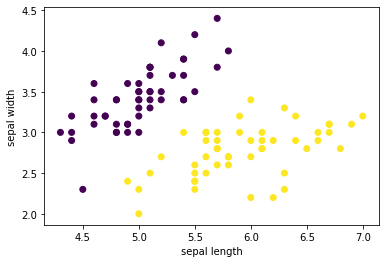

In [7]:
#取sepal的长宽数据
data = df.iloc[:100, [0, 1, -1]]
plt.scatter(data['sepal length'],data['sepal width'],c=data['label'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

下面使用这个线性可分的数据，使用感知机模型，找出分类超平面：

In [13]:
X, y = np.array(data)[:,:-1], np.array(data)[:,-1]

In [10]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [9]:
y = np.array([1 if i == 1 else -1 for i in y]) #y的值由0,1 变为1，-1

由此得到模型规定的数组型数据。

In [27]:
clf= Perceptron()
clf.fit(X,y)

In [28]:
print("分类超平面系数:" )
print(clf.coef_)
print("分类超平面截距:")
print(clf.intercept_)

分类超平面系数:
[  7.9  -10.07]
分类超平面截距:
-12.399999999999972


Text(0, 0.5, 'sepal width')

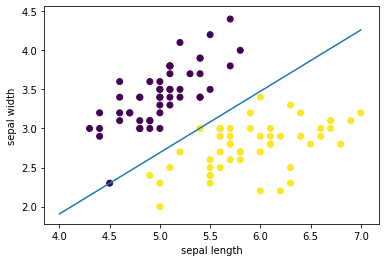

In [29]:
x_points = np.linspace(4, 7, 10)
y_ = -(clf.coef_[0] * x_points + clf.intercept_) / clf.coef_[1]#原来的公式应该是w1*x + w2*y + b = 0 也就是y=(w1*x + b)/ w2
plt.plot(x_points, y_)

plt.scatter(data['sepal length'],data['sepal width'],c=data['label'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

根据分类超平面预测：

In [30]:
X_test = np.array([[5.5,2.5],[4.5,3.0],[5.0,2.0]])
clf.predict(X_test)

array([ 1, -1,  1])

看一下scikit-learn中的结果：

In [33]:
from sklearn.linear_model import Perceptron as Ptn

In [35]:
clf2=Ptn()
clf2.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Text(0, 0.5, 'sepal width')

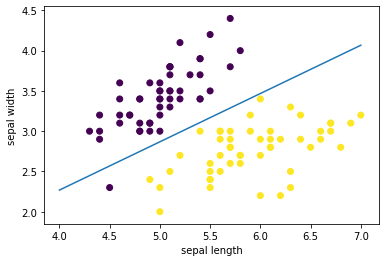

In [40]:
x_points = np.linspace(4, 7, 10)
y_ = -(clf2.coef_[0][0] * x_points + clf2.intercept_) / clf2.coef_[0][1]#它们中的系数是一个2维数组
plt.plot(x_points, y_)

plt.scatter(data['sepal length'],data['sepal width'],c=data['label'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')